# Loading Packages

In [1]:
import os
import torch
from utils.visualize       import visualize_images_from_classes
from utils.datasets        import returnDataLoader
from utils.model_execution import runFMA, runDLA
from utils.analysis        import print_analysis

/home/sysop/programming/python/work/HistoART/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.xpu.is_available():
    device = torch.device("xpu")
elif torch.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

print(f"Using device: {device}")

Using device: xpu


# Load Patches

In [6]:
while True:
    data_dir = input("Please enter the dataset directory, for example: ./data/: ") or "./data/D40x/test/"

    if not os.path.isdir(data_dir):
        print(f"Directory '{data_dir}' does not exist. Please try again.\n")
        continue
    print("\nDataset directory confirmed.\n")

    break

classes            = []
artifact_free      = input("Please enter the name of the artifact free folder (e.g., artifact_free): ").strip()
artifact_free_path = os.path.join(data_dir, artifact_free)

if artifact_free and os.path.isdir(artifact_free_path):
    classes.append(artifact_free)
    print(f"Folder '{artifact_free_path}' exists and was added as artifact free.")
else:
    if artifact_free:
        print(f"Folder '{artifact_free_path}' does not exist. Please check the name.")

artifact      = input("Please enter the name of the artifact folder (e.g., artifact): ").strip()
artifact_path = os.path.join(data_dir, artifact)

if artifact and os.path.isdir(artifact_path):
    classes.append(artifact)
    print(f"Folder '{artifact_path}' exists and was added as artifact.")
else:
    if artifact:
        print(f"Folder '{artifact_path}' does not exist. Please check the name.")

if classes:
    print("\nDataset loaded successfully.")
else:
    print("\nNo valid class folders were provided. Defaulting to sample classes.")
    classes = ['artifact_free', 'blur']



Dataset directory confirmed.


No valid class folders were provided. Defaulting to sample classes.


# Random visualization of different classes

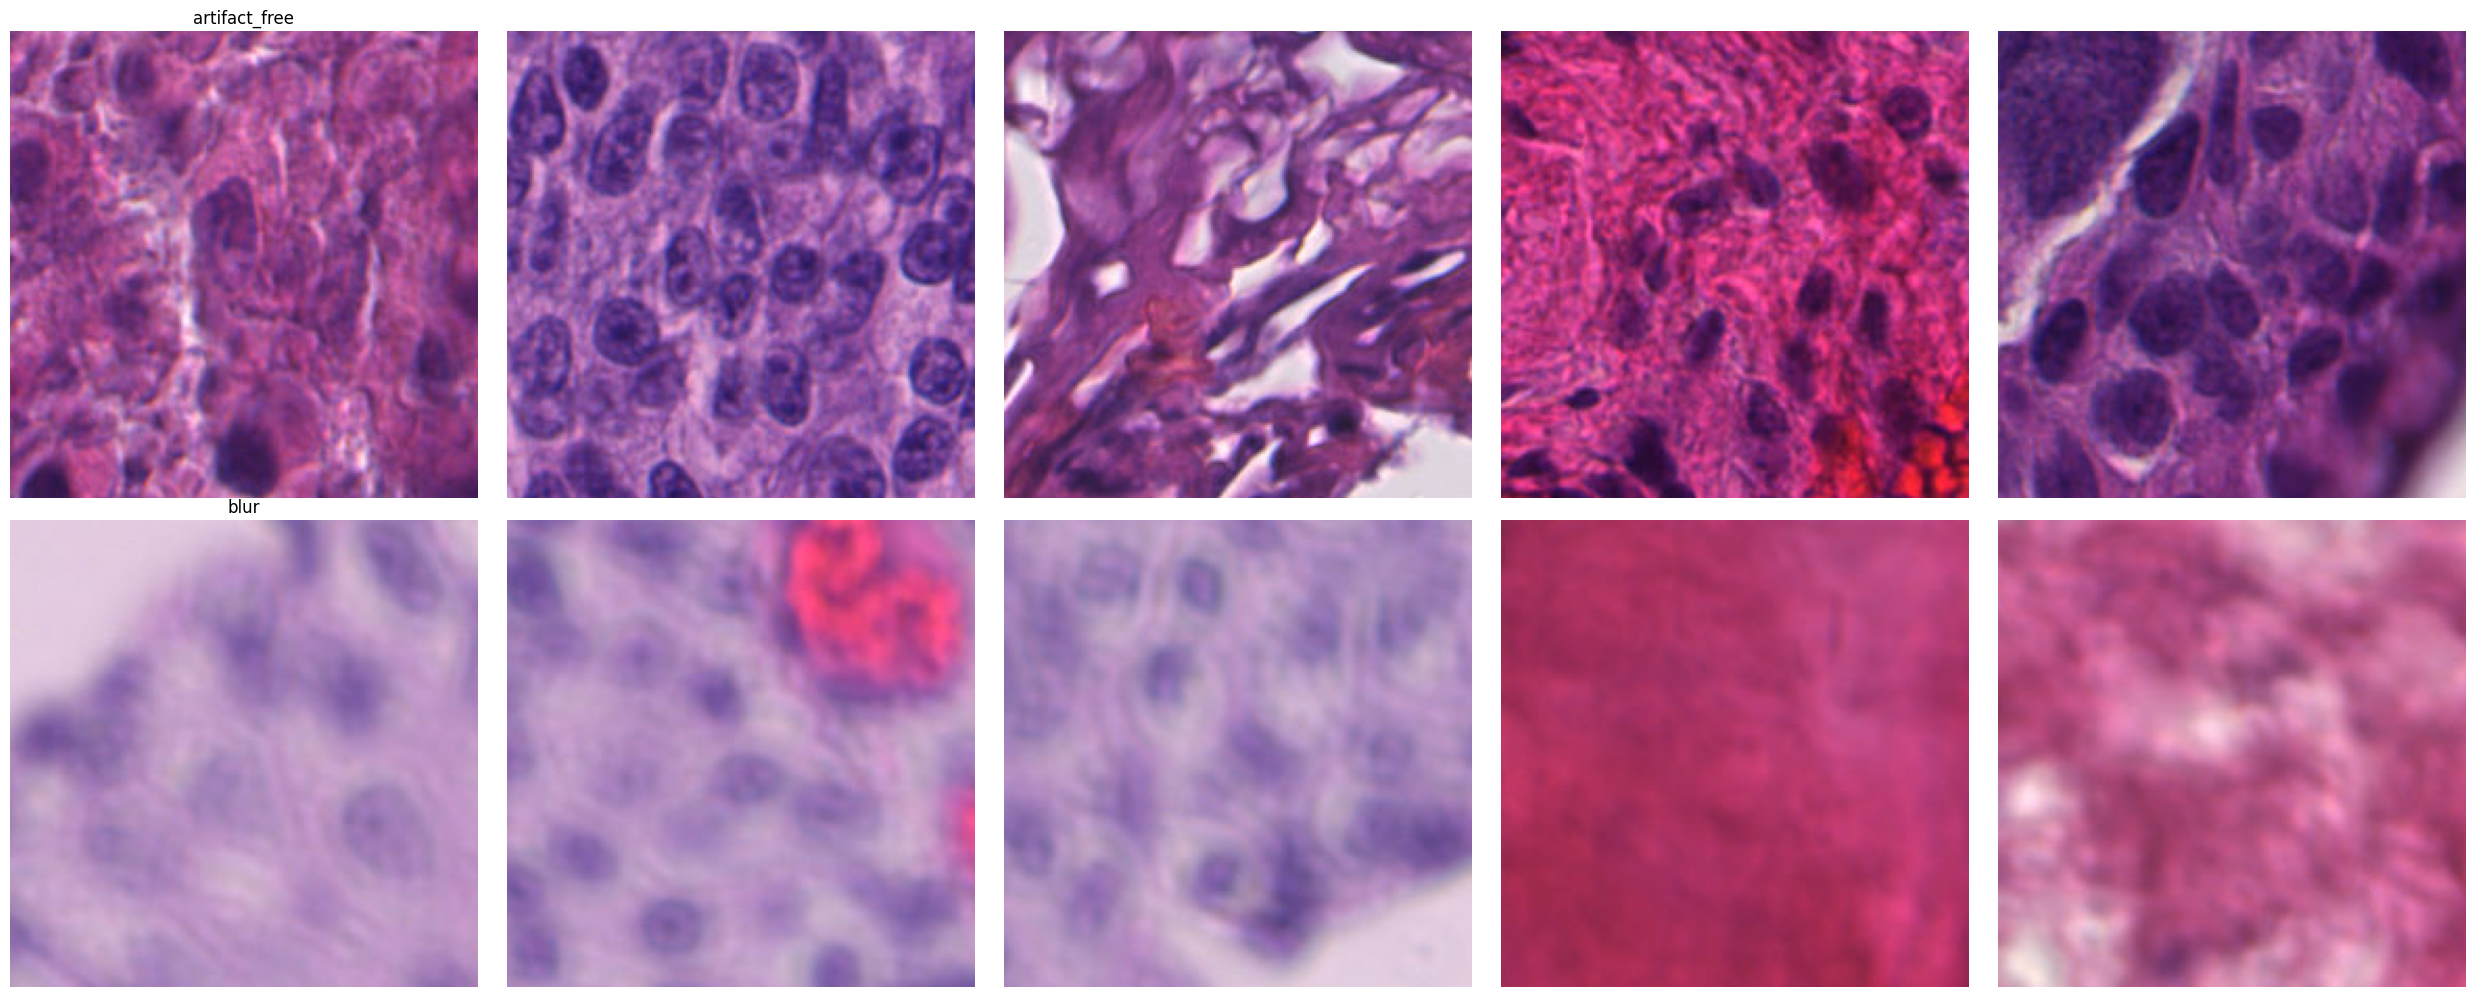

In [ ]:
visualize_images_from_classes(data_dir, classes)

# Prepare data for classification

In [ ]:
dataloader = returnDataLoader(data_dir, classes)
print("Total dataset size (samples): ", len(dataloader.dataset))


# Classify images with different models

### FMA

In [ ]:
runFMA(dataloader, device, './models/fma_binary.pth')

### DLA

In [ ]:
runDLA(dataloader, device, './models/dla_binary.pth')

### KBA

# Analysis

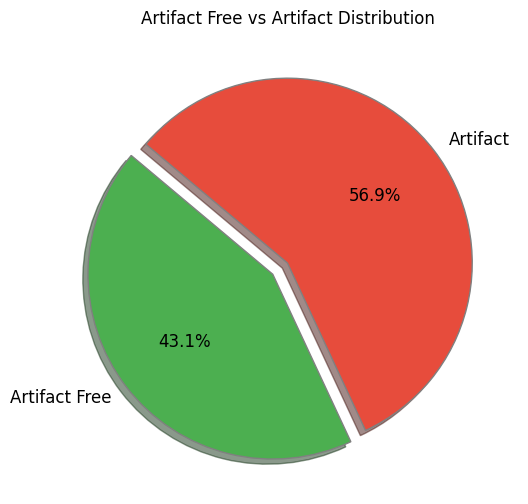

In [3]:
print_analysis('./results/fma_results.csv')

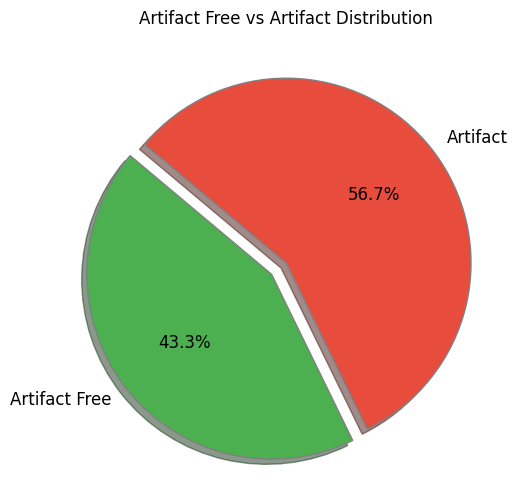

In [4]:
print_analysis('./results/dla_results.csv')